# Школа машинного обучения

<a href="https://mipt.ru/science/labs/laboratoriya-neyronnykh-sistem-i-glubokogo-obucheniya/"><img align="right" src="https://avatars1.githubusercontent.com/u/29918795?v=4&s=200" alt="DeepHackLab" style="position:relative;top:-40px;right:10px;height:100px;" /></a>



### Физтех-Школа Прикладной математики и информатики МФТИ 
### Лаборатория нейронных сетей и глубокого обучения (DeepHackLab)  


## Домашнее задание 1
### Основы Python и пакет NumPy
---


In [205]:
import numpy as np
import random
import scipy.stats as sps

### Задача 1
В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета ***numpy*** и с ним.

In [ ]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((10,10))
b = np.random.sample((10,10))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?
# ========
print (np.ndim(a), np.ndim(b))
print (np.shape(a), np.shape(b))
# ========
print(a)
print(b)

In [ ]:
def mult(a, b):
    c = []
    for i in range (10):
        c.append([])
        for j in range (10):
            c[i].append(0)
            for k in range (10):
                c[i][j]+=(a[i][k]*b[k][j])
    return (c)
print (mult(a, b))

In [ ]:
def np_mult(a, b):
    # здесь напишите перемножение матриц с
    # использованием NumPy и выведите результат
    return (a @ b)
print (mult (a,b))

In [ ]:
%%time
# засечем время работы функции без NumPy
mult(a,b)

In [ ]:
%%time
# засечем время работы функции с NumPy
np_mult(a,b)

### Задача 2
Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.  
Аналогично -- с помощью библиотеки **NumPy** и без нее. Сравните скорость, объясните результат.

In [92]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    B = A.cumsum()
    S = np.zeros(len(B))
    for i in range (len(S)):
        S[i] = B[i]/(i+1)
    return S

In [95]:
# функция без NumPy
def stupid_sec_av(A):
    S = [0 for i in range (len(A))]
    for i in range(len(A)):
        if i>0:
            S[i] = S[i-1] + A[i]
        else:
            S[i] = A[i]
    for i in range(len(A)):
        S[i] = S[i]/(i+1)
    return S

# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее
A = sps.uniform.rvs(size=10 ** 1) 
%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A)
#проверим корректность:
np.abs(S1 - S2).sum()

Wall time: 0 ns
Wall time: 0 ns


0.0

### Задача 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все четные элементы исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив X с преобразованным X и вывести в обратном порядке. 

In [199]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    Z = np.zeros(len(X))
    Z[0:len(X):2] = X[-2::-2]
    Z = Z**3
    Z[1:len(X):2] = a
    Y = np.hstack((X, Z))
    Y = Y[len(Y)::-1]
    return Y

In [200]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X, a=1):
    Z = [0 for i in range (len(X))]
    A = [0 for i in range ((len(X)+1)//2)]
    for i in range (1, len(X), 2):
        Z[i] = a
    for i in range (0, len(X), 2):
        Z[i] = X[i]**3
        A[i//2] = Z[i]
    for i in range (len(A)):
        Z[i*2] = A[len(A)-i-1]
    Y = X
    for i in range (len(Z)):
        Y = np.append(Y, Z[i])
    Y = Y[len(Y)::-1]
    return Y

In [202]:
X = sps.uniform.rvs(size=10 ** 7) 
# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X)
%time S2 = stupid_transformation(X)
# проверим корректность:
np.abs(S1 - S2).sum()

Wall time: 4 ms
Wall time: 556 ms


0.0

Почему методы ***numpy*** оказываются эффективнее?

In [ ]:
# Ваш ответ

## Дополнительные задачи

Дополнительные задачи подразумевают, что Вы самостоятельно разберётесь в некоторых функциях ***numpy***, чтобы их сделать.  

Эти задачи не являются обязательными, но могут повлиять на Ваш рейтинг в лучшую сторону (точные правила учёта доп. задач будут оглашены позже).

### Задача 4*

Дана функция двух переменных: $f(x, y) = sin(x)cos(y)$ (это просто такой красивый 3D-график), а также дана функция для отрисовки $f(x, y)$ (`draw_f()`), которая принимает на вход двумерную сетку, на которой будет вычисляться функция.  

Вам нужно разобраться в том, как строить такие сетки (подсказка - это одна конкретная функция ***numpy***), и подать такую сетку на вход функции отрисовки.

In [209]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def f(x, y):
    '''Функция двух переменных'''
    return np.sin(x) * np.cos(y)

def draw_f(grid_x, grid_y):
    '''Функция отрисовки функции f(x, y)'''
    fig = plt.figure(figsize=(10, 8))
    ax = Axes3D(fig)
    ax.plot_surface(grid_x, grid_y, f(grid_x, grid_y), cmap='inferno')
    plt.show()

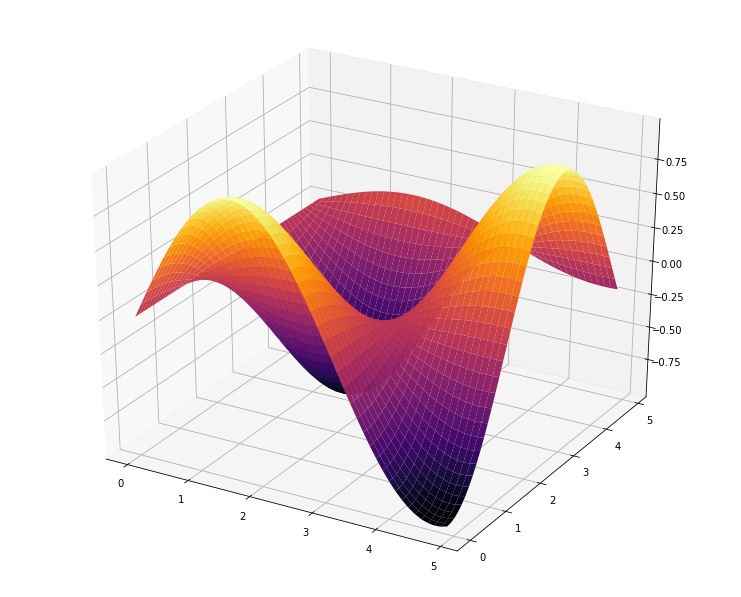

In [212]:
grid_x, grid_y = np.mgrid[0:5:0.1,0:5:0.1]

draw_f(grid_x, grid_y)

### Задача 5*

Вам дана картинка. При загрузке её размерность равна 3: **(w, h, num_channels)**, где **w** - ширина картинки в пикселях, **h** - высота картинки в пикселях, **num_channels** - количество каналов *(R, G, B, alpha)*.

Вам нужно "развернуть" картинку в одномерный массив размера w \* h \* num_channels, написав **одну строку кода**.

In [213]:
from matplotlib import pyplot as plt
%matplotlib inline

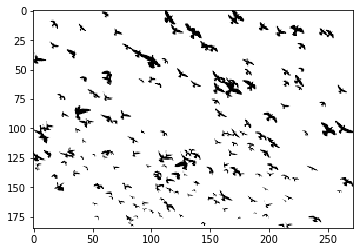

In [221]:
path_to_image = './image.png'
image_array = plt.imread(path_to_image)
plt.imshow(image_array);

In [222]:
flat_image_array = np.asarray(image_array)

In [224]:
print (np.shape(flat_image_array))

(185, 272, 3)
